In [17]:
import os
_dir = os.getcwd()
_result_dir = _dir + "/results"

import cloudpickle as pickle
import pprint as pp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Plot 1: image pulling time over dockerd cpu shares

Setup: 8 cores machine, docker 18.06, pigz decompression

Result format:

`[{'configs': {'docker_cpu_shares': 7168,
              'dockerd_cpu_shares': 1024,
              'trials': 1},
  'name': 'baseline',
  'results': [10.703615665435791]},
  ...]`

In [18]:
with open(_result_dir + "/httpd68c6.pickle", "rb") as f:
    results = pickle.load(f)

In [67]:
x, means, stdvs = list(), list(), list()
x_raw, y_raw = list(), list()
for r in results:
    x.append(r["name"])
    _values = r["results"]
    means.append(np.mean(_values))
    stdvs.append(np.std(_values))
    
    x_raw += [r["name"]] * len(values)
    y_raw += _values

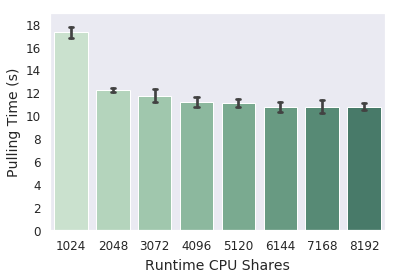

In [100]:
df = pd.DataFrame({"x": x_raw, "y": y_raw})
sns.set_style("dark")
ax = sns.barplot(x="x", y="y", data=df, 
                 palette=sns.color_palette("ch:2.5,-.2,dark=.3", n_colors=10), ci="sd", capsize=.1)

ax.set_ylim(0, 19)
ax.set_yticks(list(range(0, 20, 2)))
ax.set_ylabel("Pulling Time (s)", fontsize=14)
ax.set_xlabel("Runtime CPU Shares", fontsize=14, labelpad=6)
ax.tick_params(axis='both', which='major', labelsize=12)

### Plot 2: resource lending on/off

### Plot 3: resource lending on/off